<a href="https://colab.research.google.com/github/zainamri/Kelompok-3-/blob/main/infografis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/olahdatagenz.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pemahaman Data

In [ ]:
# Menampilkan data teratas
data.head()

,Unnamed: 0,Apakah Anda pernah membeli produk Fashion melalui e-commerce?,Nama,Jenis Kelamin,Usia,Status Pekerjaan,Penghasilan Bulanan,"Lokasi Tempat Tinggal\nKota Besar (Populasi penduduk 1jt +) E.g Jakarta, Bandung, Surabaya\nKota Menengah (Populasi penduduk 500rb - 1jt) E.g Depok, Bogor, Yogyakarta\nKota Kecil (Populasi penduduk < 500rb) E.g Sukabumi, Cirebon, Kab.Bogor",Seberapa sering Anda membeli produk fashion melalui e-commerce?,Platform E-Commerce yang sering digunakan untuk membeli produk fashion,...,Saya lebih cenderung membeli produk fashion dengan rating tinggi (4 bintang ke atas) di e-commerce.,Rating produk yang tinggi menunjukkan bahwa produk tersebut berkualitas baik dan dapat dipercaya.,Saya selalu melihat rating produk terlebih dahulu sebelum memutuskan untuk membeli produk fashion di e-commerce.,"Saya merasa lebih percaya membeli produk fashion yang memiliki rating tinggi dibandingkan yang memiliki rating rendah, meskipun harga lebih tinggi.",Saya tidak akan membeli produk dengan rating rendah meskipun harganya menarik di e-commerce.,Saya merasa lebih tertarik membeli produk fashion setelah membaca ulasan positif dari pelanggan lain di e-commerce.,Harga yang terjangkau membuat saya lebih tertarik untuk membeli produk fashion melalui e-commerce.,Saya lebih tertarik membeli produk fashion yang memiliki rating tinggi di e-commerce dibandingkan dengan produk yang memiliki rating rendah.,Saya merasa lebih yakin membeli produk fashion jika produk tersebut memiliki banyak ulasan positif dan rating tinggi.,Saya akan lebih cenderung membeli produk fashion yang harganya sesuai dengan kualitas dan memiliki rating tinggi.
0,1,Ya,ARIF AMANU,Laki - laki,18 - 22 Tahun,Berkerja,Rp2.000.000 - Rp4.000.000,Kota Besar,Kadang-Kadang,Shopee,...,5,5,5,5,5,5,3,5,5,5
1,2,Ya,Igo Ferdiansyah,Laki - laki,18 - 22 Tahun,Berkerja,Rp4.000.000 - Rp6.000.000,Kota Menengah,Kadang-Kadang,Shopee,...,4,4,4,5,4,4,3,4,4,4
2,3,Ya,Izul,Laki - laki,18 - 22 Tahun,Pelajar/Mahasiswa,Kurang dari Rp2.000.000,Kota Besar,Cukup Sering,Shopee,...,5,5,5,4,3,4,4,5,4,4
3,4,Ya,Dimas,Laki - laki,18 - 22 Tahun,Pelajar/Mahasiswa,Tidak Bekerja,Kota Besar,Kadang-Kadang,Tokopedia,...,3,5,5,3,2,5,4,3,5,4
4,5,Ya,Fransiscus Prayoga,Laki - laki,18 - 22 Tahun,Pelajar/Mahasiswa,Tidak Bekerja,Kota Kecil/ Kabupaten,Kadang-Kadang,Shopee,...,5,5,5,5,5,5,5,5,5,5


In [ ]:
# Menampilkan Info Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column                                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                        --------------  ----- 
 0   Unnamed: 0                                                                                                                                                                                                                                    200 non-null    int64 
 1   Apakah Anda pernah membeli produk Fashion melalui e-commerce?                               

Pembersihan Data

In [ ]:
# Identifikasi dan tangani missing values jika ada
print(data.isnull().sum())

Unnamed: 0                                                                                                                                                                                                                                         0
Apakah Anda pernah membeli produk Fashion melalui e-commerce?                                                                                                                                                                                      0
Nama                                                                                                                                                                                                                                               0
Jenis Kelamin                                                                                                                                                                                                                                      0
Usia                

In [ ]:
# Menghapus kolom yang tidak relevan
data = data.drop(columns=['Unnamed: 0', 'Apakah Anda pernah membeli produk Fashion melalui e-commerce?', 'Nama'])


In [ ]:
data.rename(columns={ 'Lokasi Tempat Tinggal\nKota Besar (Populasi penduduk 1jt +) E.g Jakarta, Bandung, Surabaya\nKota Menengah (Populasi penduduk 500rb - 1jt) E.g Depok, Bogor, Yogyakarta\nKota Kecil (Populasi penduduk < 500rb) E.g Sukabumi, Cirebon, Kab.Bogor':'Lokasi Tinggal',
                      'Seberapa sering Anda membeli produk fashion melalui e-commerce? ': 'Seberapa sering',
                      'Platform E-Commerce yang sering digunakan untuk membeli produk fashion ': 'Platform E-Commerce'
}, inplace=True)
data.rename(columns={
    'Seberapa penting bagi Anda untuk membaca ulasan produk sebelum membeli produk fashion di e-commerce? ': 'X1',
    'Ulasan positif dari pelanggan lain membuat saya lebih yakin untuk membeli produk fashion. ': 'X2',
    'Apakah Anda percaya bahwa ulasan produk yang banyak membantu dalam pengambilan keputusan Anda saat membeli produk fashion secara online? ': 'X3',
    'Saya lebih cenderung membeli produk fashion jika ulasan yang ada memberikan informasi yang detail tentang kualitas dan fit produk. ': 'X4',
    'Harga produk fashion adalah faktor yang sangat mempengaruhi keputusan saya dalam berbelanja di e-commerce. ': 'X5',
    'Saya lebih memilih produk fashion yang sedang diskon atau memiliki penawaran harga menarik di e-commerce. ': 'X6',
    'Harga produk di e-commerce seringkali menjadi pertimbangan utama saya dibandingkan dengan kualitas produk itu sendiri. ': 'X7',
    'Saya merasa bahwa harga produk fashion di e-commerce sering lebih terjangkau dibandingkan dengan harga di toko fisik. ': 'X8',
    'Saya lebih tertarik membeli produk fashion yang harganya sesuai dengan kualitas yang ditawarkan, meskipun harga sedikit lebih tinggi. ': 'X9',
    'Saya lebih cenderung membeli produk fashion dengan rating tinggi (4 bintang ke atas) di e-commerce.  ': 'X10',
    'Rating produk yang tinggi menunjukkan bahwa produk tersebut berkualitas baik dan dapat dipercaya. ': 'X11',
    'Saya selalu melihat rating produk terlebih dahulu sebelum memutuskan untuk membeli produk fashion di e-commerce. ': 'X12',
    'Saya merasa lebih percaya membeli produk fashion yang memiliki rating tinggi dibandingkan yang memiliki rating rendah, meskipun harga lebih tinggi. ': 'X13',
    'Saya tidak akan membeli produk dengan rating rendah meskipun harganya menarik di e-commerce. ': 'X14'
}, inplace=True)

# Mengganti nama kolom untuk variabel dependen
data.rename(columns={
    'Saya merasa lebih tertarik membeli produk fashion setelah membaca ulasan positif dari pelanggan lain di e-commerce. ': 'Y1',
    'Harga yang terjangkau membuat saya lebih tertarik untuk membeli produk fashion melalui e-commerce. ': 'Y2',
    'Saya lebih tertarik membeli produk fashion yang memiliki rating tinggi di e-commerce dibandingkan dengan produk yang memiliki rating rendah. ': 'Y3',
    'Saya merasa lebih yakin membeli produk fashion jika produk tersebut memiliki banyak ulasan positif dan rating tinggi.  ': 'Y4',
    'Saya akan lebih cenderung membeli produk fashion yang harganya sesuai dengan kualitas dan memiliki rating tinggi. ': 'Y5'
}, inplace=True)


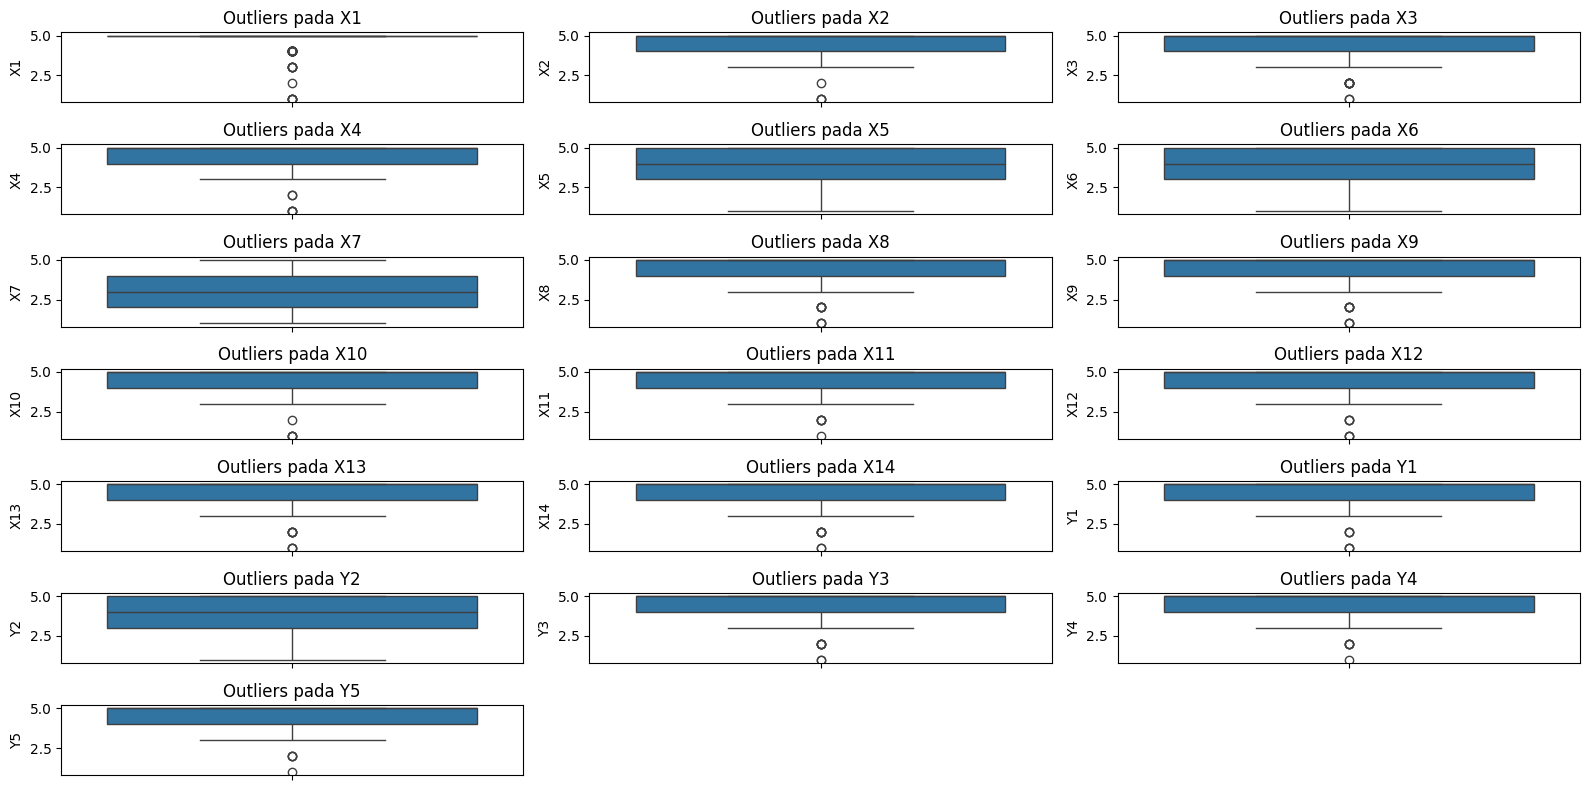

In [ ]:
import math

# Mengambil semua kolom numerik
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Menentukan jumlah kolom dan baris untuk subplot
num_cols = 3  # Jumlah kolom yang diinginkan
num_rows = math.ceil(len(numeric_cols) / num_cols)  # Menghitung jumlah baris

# Visualisasi boxplot untuk mendeteksi outliers pada semua kolom numerik
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Outliers pada {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Menghitung Q1 dan Q3 untuk setiap kolom
outlier_dict = {}
for col in numeric_cols:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

# Menyimpan outliers dalam dictionary
outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
outlier_dict[col] = outliers

# Menampilkan outliers untuk setiap kolom
for col, outliers in outlier_dict.items():
  print(f"Outliers pada {col}:")
  print(outliers)


Outliers pada Y5:
    Jenis Kelamin           Usia   Status Pekerjaan  \
15    Laki - laki  18 - 22 Tahun  Pelajar/Mahasiswa   
46    Laki - laki  18 - 22 Tahun           Berkerja   
129   Laki - laki  23 - 27 Tahun           Berkerja   
170   Laki - laki  18 - 22 Tahun  Pelajar/Mahasiswa   

           Penghasilan Bulanan Lokasi Tinggal Seberapa sering  \
15               Tidak Bekerja     Kota Besar   Kadang-Kadang   
46   Rp4.000.000 - Rp6.000.000  Kota Menengah   Kadang-Kadang   
129  Rp4.000.000 - Rp6.000.000     Kota Besar    Cukup Sering   
170    Kurang dari Rp2.000.000     Kota Besar   Sangat Jarang   

    Platform E-Commerce  X1  X2  X3  ...  X10  X11  X12  X13  X14  Y1  Y2  Y3  \
15               Shopee   1   1   2  ...    1    1    1    1    1   2   1   1   
46               Shopee   5   5   3  ...    5    4    3    5    3   4   4   4   
129              Shopee   1   1   2  ...    1    2    1    2    2   1   2   2   
170           Tokopedia   1   1   1  ...    1    2    1 

In [ ]:
median_Y5 = data['Y5'].median()
data['Y5'] = np.where((data['Y5'] < lower_bound) | (data['Y5'] > upper_bound), median_Y5, data['Y5'])

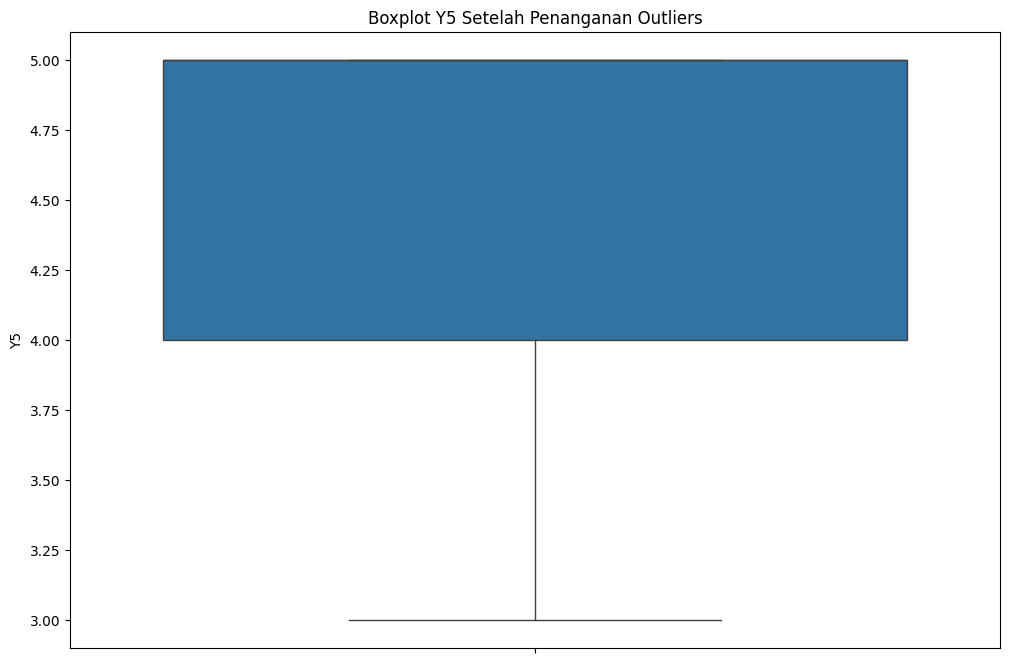

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(y=data['Y5'])
plt.title('Boxplot Y5 Setelah Penanganan Outliers')
plt.show()

# 3. Analisis Deskriptif  


In [ ]:
# Hitung statistik deskriptif
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y1,Y2,Y3,Y4,Y5
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.00000
mean,4.680000,4.570000,4.335000,4.590000,3.970000,3.980000,3.275000,4.265000,4.335000,4.605000,4.420000,4.530000,4.315000,4.330000,4.410000,4.02000,4.410000,4.485000,4.54500
std,0.774986,0.760257,0.892613,0.815614,0.976662,0.992231,1.287503,0.904914,0.875562,0.769373,0.759264,0.801443,0.882991,0.913935,0.821752,0.97692,0.827845,0.756729,0.65584
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.00000
25%,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.00000,4.000000,4.000000,4.00000
50%,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.00000,5.000000,5.000000,5.00000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000


In [ ]:
# Membuat DataFrame untuk variabel independen
customer_review = data[['X1', 'X2', 'X3', 'X4']]

harga = data[['X5', 'X6', 'X7', 'X8', 'X9']]

customer_rating = data[['X10', 'X11', 'X12', 'X13', 'X14']]

# Membuat DataFrame untuk variabel dependen
minat_beli = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']]

# Menggabungkan semua DataFrame menjadi satu DataFrame utama
final_data = pd.concat([customer_review, harga, customer_rating, minat_beli], axis=1)

# Menampilkan DataFrame akhir
final_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y1,Y2,Y3,Y4,Y5
0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,5,5,5.0
1,5,5,4,5,3,2,3,3,5,4,4,4,5,4,4,3,4,4,4.0
2,5,5,5,5,4,5,3,4,4,5,5,5,4,3,4,4,5,4,4.0
3,4,3,3,4,4,5,5,5,2,3,5,5,3,2,5,4,3,5,4.0
4,5,5,5,5,5,4,5,4,5,5,5,5,5,5,5,5,5,5,5.0


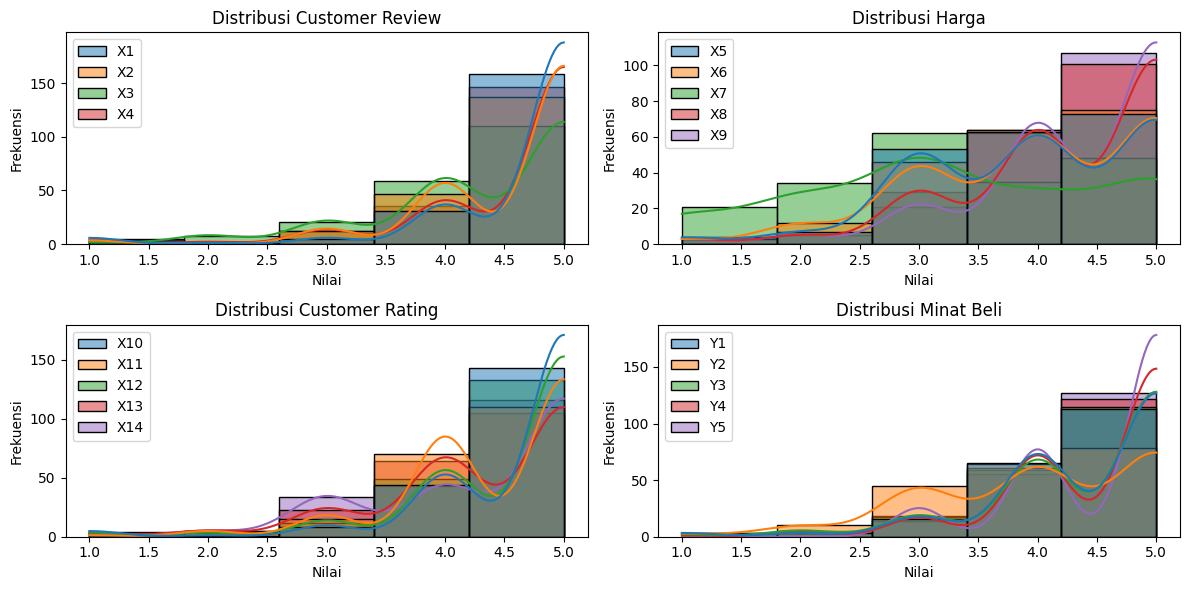

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi data menggunakan histogram
plt.figure(figsize=(12, 6))

# Histogram untuk variabel independen (customer review)
plt.subplot(2, 2, 1)
sns.histplot(final_data[['X1', 'X2', 'X3', 'X4']], bins=5, kde=True)
plt.title('Distribusi Customer Review')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Histogram untuk variabel harga
plt.subplot(2, 2, 2)
sns.histplot(final_data[['X5', 'X6', 'X7', 'X8', 'X9']], bins=5, kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Histogram untuk variabel customer rating
plt.subplot(2, 2, 3)
sns.histplot(final_data[['X10', 'X11', 'X12', 'X13', 'X14']], bins=5, kde=True)
plt.title('Distribusi Customer Rating')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Histogram untuk variabel minat beli
plt.subplot(2, 2, 4)
sns.histplot(final_data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']], bins=5, kde=True)
plt.title('Distribusi Minat Beli')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan 'final_data' adalah DataFrame yang sudah ada
# Menghitung total untuk customer review
final_data['Total_Customer_Review'] = final_data[['X1', 'X2', 'X3', 'X4']].sum(axis=1)

# Menghitung total untuk harga
final_data['Total_Harga'] = final_data[['X5', 'X6', 'X7', 'X8', 'X9']].sum(axis=1)

# Menghitung total untuk customer rating
final_data['Total_Customer_Rating'] = final_data[['X10', 'X11', 'X12', 'X13', 'X14']].sum(axis=1)

# Menghitung total untuk minat beli
final_data['Total_Minat_Beli'] = final_data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']].sum(axis=1)

# Menampilkan DataFrame dengan kolom total
print(final_data[['Total_Customer_Review', 'Total_Harga', 'Total_Customer_Rating', 'Total_Minat_Beli']].head())


   Total_Customer_Review  Total_Harga  Total_Customer_Rating  Total_Minat_Beli
0                     20           25                     25              23.0
1                     19           16                     21              19.0
2                     20           20                     22              21.0
3                     14           21                     18              21.0
4                     20           23                     25              25.0


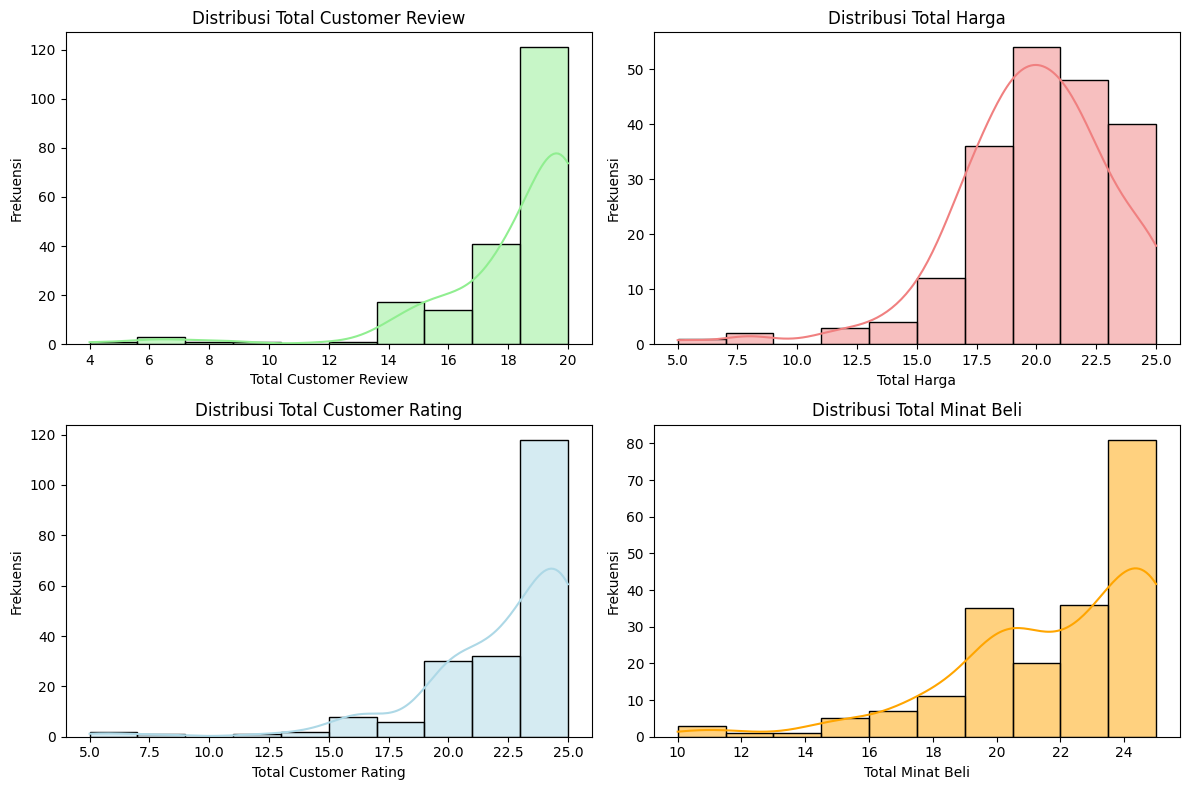

In [ ]:
# Visualisasi distribusi total menggunakan histogram
plt.figure(figsize=(12, 8))

# Histogram untuk Total Customer Review
plt.subplot(2, 2, 1)
sns.histplot(final_data['Total_Customer_Review'], bins=10, kde=True, color='lightgreen')
plt.title('Distribusi Total Customer Review')
plt.xlabel('Total Customer Review')
plt.ylabel('Frekuensi')

# Histogram untuk Total Harga
plt.subplot(2, 2, 2)
sns.histplot(final_data['Total_Harga'], bins=10, kde=True, color='lightcoral')
plt.title('Distribusi Total Harga')
plt.xlabel('Total Harga')
plt.ylabel('Frekuensi')

# Histogram untuk Total Customer Rating
plt.subplot(2, 2, 3)
sns.histplot(final_data['Total_Customer_Rating'], bins=10, kde=True, color='lightblue')
plt.title('Distribusi Total Customer Rating')
plt.xlabel('Total Customer Rating')
plt.ylabel('Frekuensi')

# Histogram untuk Total Minat Beli
plt.subplot(2, 2, 4)
sns.histplot(final_data['Total_Minat_Beli'], bins=10, kde=True, color='orange')
plt.title('Distribusi Total Minat Beli')
plt.xlabel('Total Minat Beli')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Jenis Kelamin        200 non-null    object 
 1   Usia                 200 non-null    object 
 2   Status Pekerjaan     200 non-null    object 
 3   Penghasilan Bulanan  200 non-null    object 
 4   Lokasi Tinggal       200 non-null    object 
 5   Seberapa sering      200 non-null    object 
 6   Platform E-Commerce  200 non-null    object 
 7   X1                   200 non-null    int64  
 8   X2                   200 non-null    int64  
 9   X3                   200 non-null    int64  
 10  X4                   200 non-null    int64  
 11  X5                   200 non-null    int64  
 12  X6                   200 non-null    int64  
 13  X7                   200 non-null    int64  
 14  X8                   200 non-null    int64  
 15  X9                   200 non-null    int

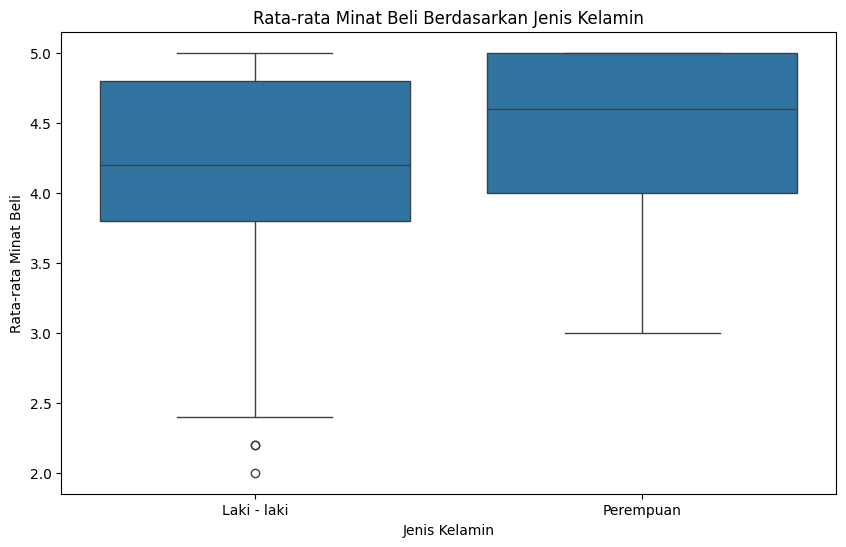

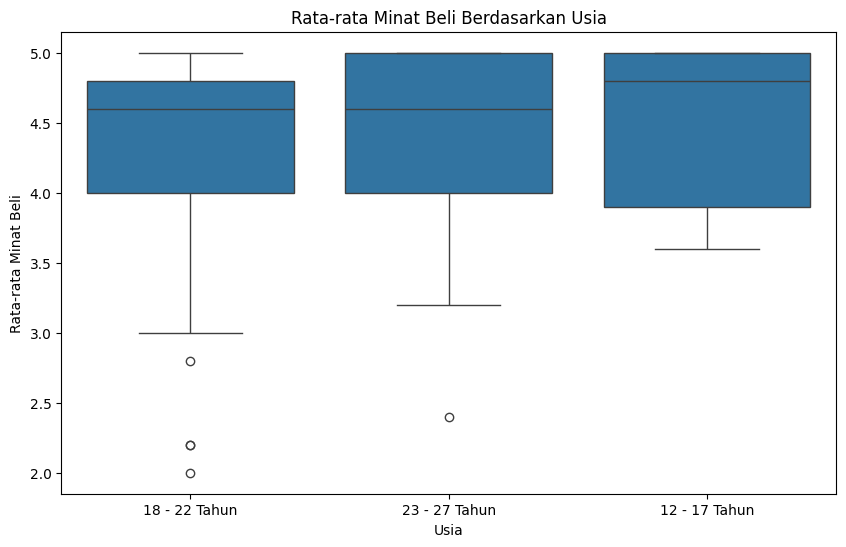

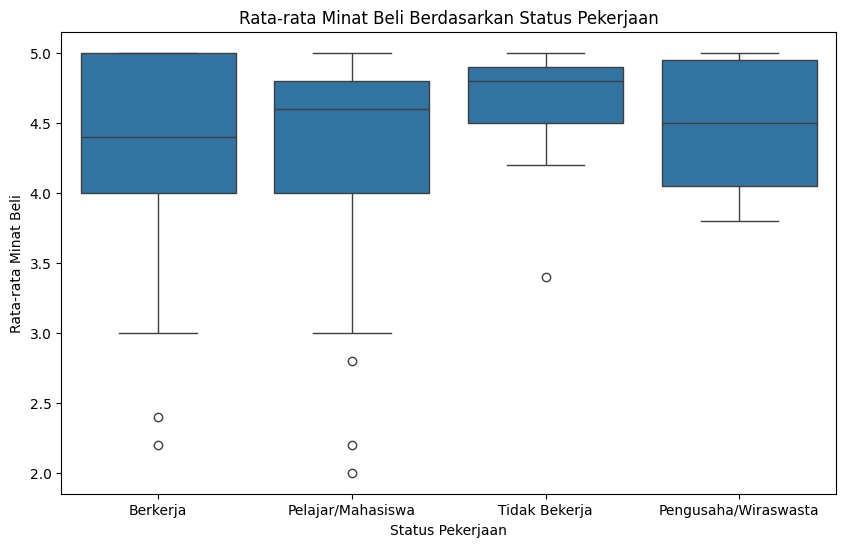

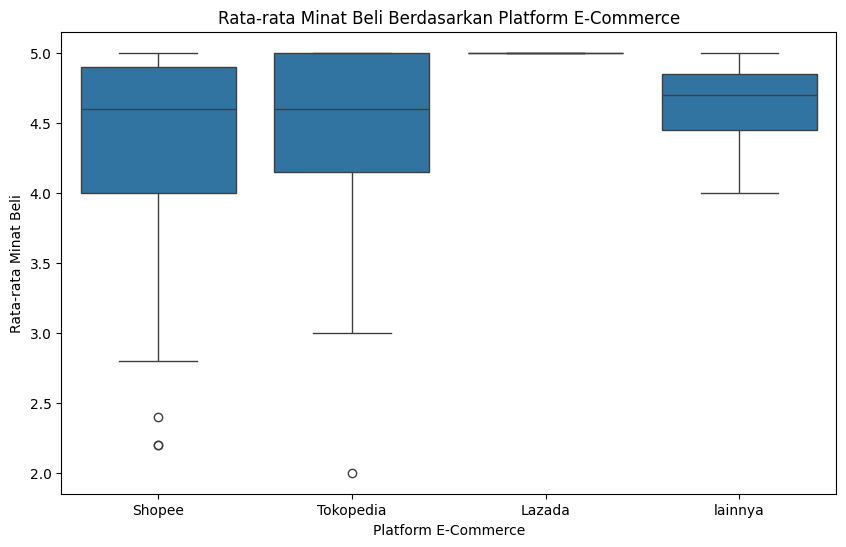

In [ ]:
# Menghitung rata-rata minat beli
data['Rata_Rata_Minat_Beli'] = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']].mean(axis=1)
data['Total_Minat_Beli'] = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']].sum(axis=1)

# 1. Visualisasi Rata-rata Minat Beli Berdasarkan Jenis Kelamin
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jenis Kelamin', y='Rata_Rata_Minat_Beli', data=data)
plt.title('Rata-rata Minat Beli Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Minat Beli')
plt.show()

# 2. Visualisasi Rata-rata Minat Beli Berdasarkan Usia
plt.figure(figsize=(10, 6))
sns.boxplot(x='Usia', y='Rata_Rata_Minat_Beli', data=data)
plt.title('Rata-rata Minat Beli Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Minat Beli')
plt.show()

# 3. Visualisasi Rata-rata Minat Beli Berdasarkan Status Pekerjaan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status Pekerjaan', y='Rata_Rata_Minat_Beli', data=data)
plt.title('Rata-rata Minat Beli Berdasarkan Status Pekerjaan')
plt.xlabel('Status Pekerjaan')
plt.ylabel('Rata-rata Minat Beli')
plt.show()

# 4. Visualisasi Rata-rata Minat Beli Berdasarkan Platform E-Commerce
plt.figure(figsize=(10, 6))
sns.boxplot(x='Platform E-Commerce', y='Rata_Rata_Minat_Beli', data=data)
plt.title('Rata-rata Minat Beli Berdasarkan Platform E-Commerce')
plt.xlabel('Platform E-Commerce')
plt.ylabel('Rata-rata Minat Beli')
plt.show()

Analisis Korelasi

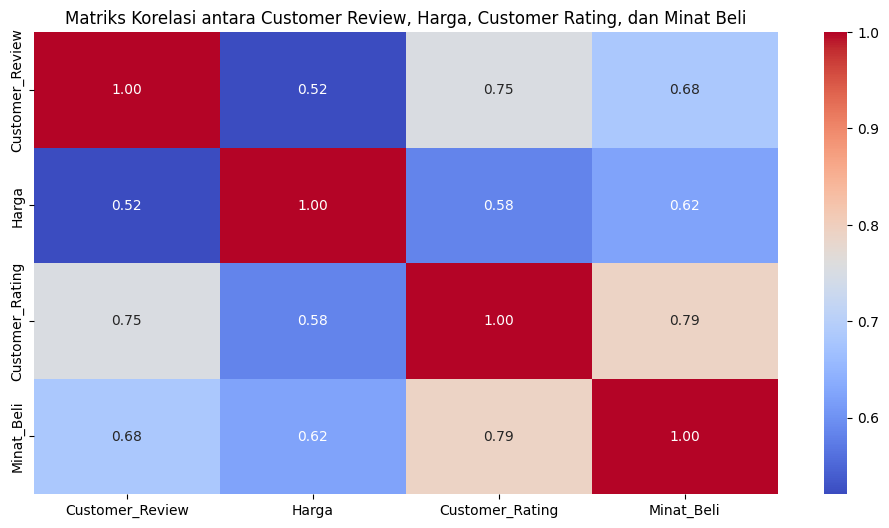

In [ ]:
# Menghitung rata-rata untuk setiap kelompok
customer_review_avg = data[['X1', 'X2', 'X3', 'X4']].mean(axis=1)
harga_avg = data[['X5', 'X6', 'X7', 'X8', 'X9']].mean(axis=1)
customer_rating_avg = data[['X10', 'X11', 'X12', 'X13', 'X14']].mean(axis=1)
minat_beli_avg = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']].mean(axis=1)

# Membuat DataFrame baru dengan hasil perhitungan
summary_df = pd.DataFrame({
    'Customer_Review': customer_review_avg,
    'Harga': harga_avg,
    'Customer_Rating': customer_rating_avg,
    'Minat_Beli': minat_beli_avg
})

# Menghitung matriks korelasi
correlation_matrix = summary_df.corr()

# Visualisasi Matriks Korelasi
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi antara Customer Review, Harga, Customer Rating, dan Minat Beli')
plt.show()


Analisis Regresi

In [ ]:
# 1. Menyiapkan data untuk regresi
X = summary_df[['Customer_Review', 'Harga', 'Customer_Rating']]
y = summary_df['Minat_Beli']

# 2. Menambahkan konstanta untuk model
X = sm.add_constant(X)

# 3. Membuat model regresi
model = sm.OLS(y, X).fit()

# 4. Menampilkan ringkasan model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Minat_Beli   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     136.0
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           1.18e-47
Time:                        16:34:55   Log-Likelihood:                -77.741
No. Observations:                 200   AIC:                             163.5
Df Residuals:                     196   BIC:                             176.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6093      0.193     

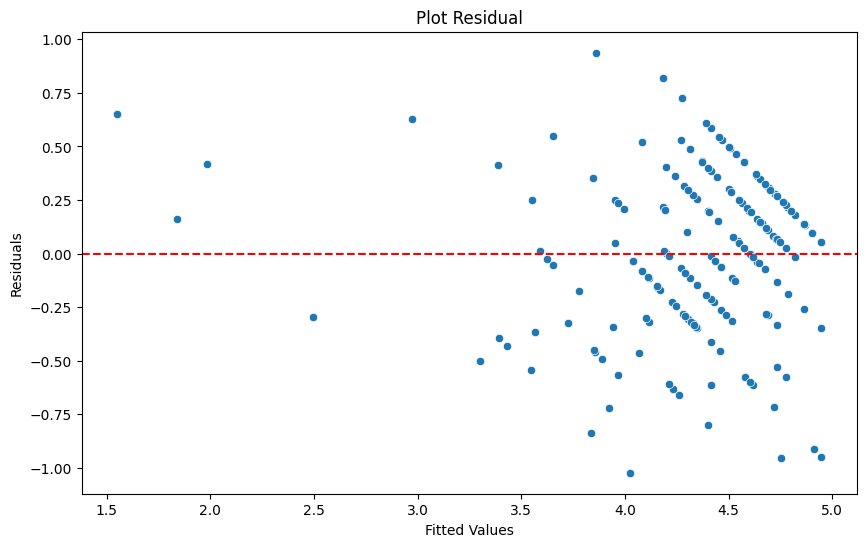

In [ ]:
# Menghitung residual
residuals = model.resid

# Visualisasi residual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Plot Residual')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
predictions = model.predict(X)
summary_df['Predicted_Minat_Beli'] = predictions


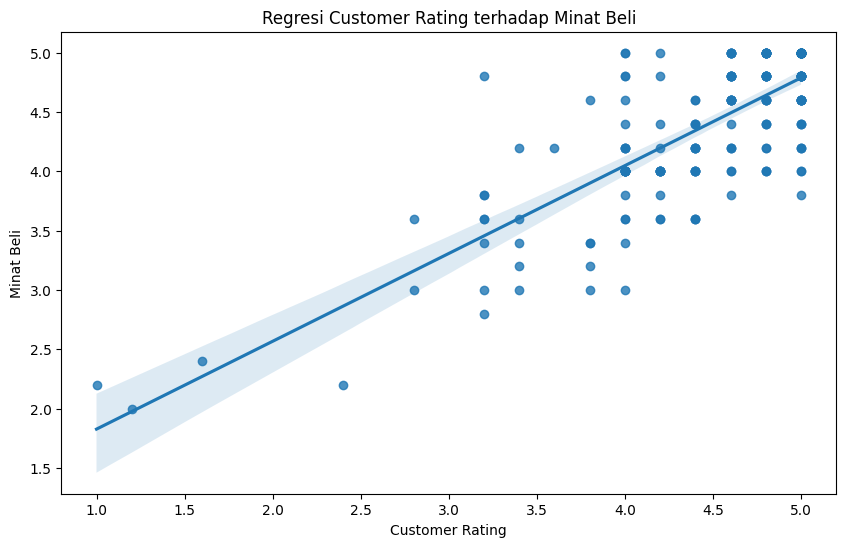

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Customer_Rating', y='Minat_Beli', data=summary_df)
plt.title('Regresi Customer Rating terhadap Minat Beli')
plt.xlabel('Customer Rating')
plt.ylabel('Minat Beli')
plt.show()
